In [1]:
import cdsapi
import xarray as xr
import matplotlib.pyplot as plt


In [2]:
# CDS API credentials
cdsapi_key = '380ede63-b497-4a6d-9886-127ba282bb58'  # Replace with your CDS API key

# Define the request parameters
year = '2022'
variable = '2m_temperature'
area = [43.501, -96.639, 40.375, -89.572]  # [north, west, south, east] coordinates
# -96.63306039630396,40.37830479583795,-90.14002756307562,43.50012771146711
# Initialize the CDS API client
c = cdsapi.Client()

In [5]:
# Request the ERA5 temperature data for Iowa in 2022
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': variable,
        'year':"2022",
        'month': "01",
        'day': "01",
        'time': '00:00',
        'area': area,
        'format': 'netcdf',
    },
    'era5_temperature.nc'  # Output file name
)


/Users/jchung/anaconda/envs/farmwise/lib/python3.9/site-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-07-09 22:45:30,492 INFO Welcome to the CDS
2023-07-09 22:45:30,492 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
/Users/jchung/anaconda/envs/farmwise/lib/python3.9/site-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-07-09 22:45:30,663 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data0/adaptor.m

Result(content_length=2000,content_type=application/x-netcdf,location=https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data0/adaptor.mars.internal-1688953652.9935503-4889-17-b964b9cc-c4b2-445d-b6e5-98b9eb5cb7db.nc)

In [7]:
ds.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:    (longitude: 29, latitude: 13, time: 1)
Coordinates:
  * longitude  (longitude) float32 -96.64 -96.39 -96.14 ... -90.14 -89.89 -89.64
  * latitude   (latitude) float32 43.38 43.12 42.88 42.62 ... 40.88 40.62 40.38
  * time       (time) datetime64[ns] 2022-01-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-07-10 01:47:33 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...>

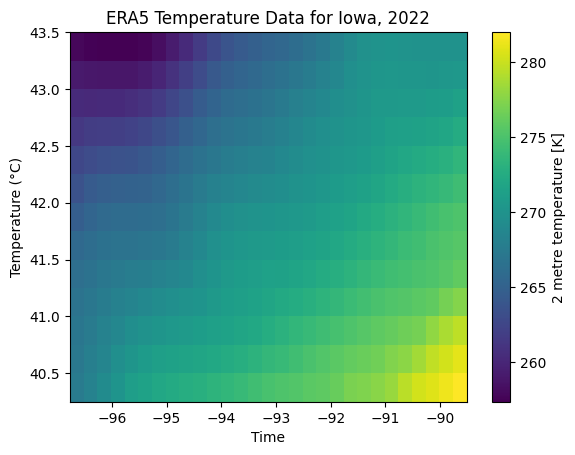

In [8]:

# Load the downloaded ERA5 temperature data using xarray
ds = xr.open_dataset('era5_temperature.nc')

# Extract the temperature variable
temperature_data = ds['t2m']

# Plotting the data
temperature_data.plot()
plt.title(f'ERA5 Temperature Data for Iowa, {year}')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.show()


In [14]:
import geemap


In [16]:
Map = geemap.Map(center=[41.878, -93.097], zoom=7)
image = geemap.xr_to_image(temperature_data)
Map.addLayer(image, {'min': -30, 'max': 40,}, 'ERA5 Temperature Data')

Map

AttributeError: module 'geemap' has no attribute 'xr_to_image'

In [17]:
type(temperature_data)

xarray.core.dataarray.DataArray

In [ ]:
temperature_data.v